Enter the Twitter Hashtag you wanna search for.
If you would like to search for more than one tweet use the following layout:
hastag1, hastag2, hashtagn...
I wanna search for: #Ubisoft


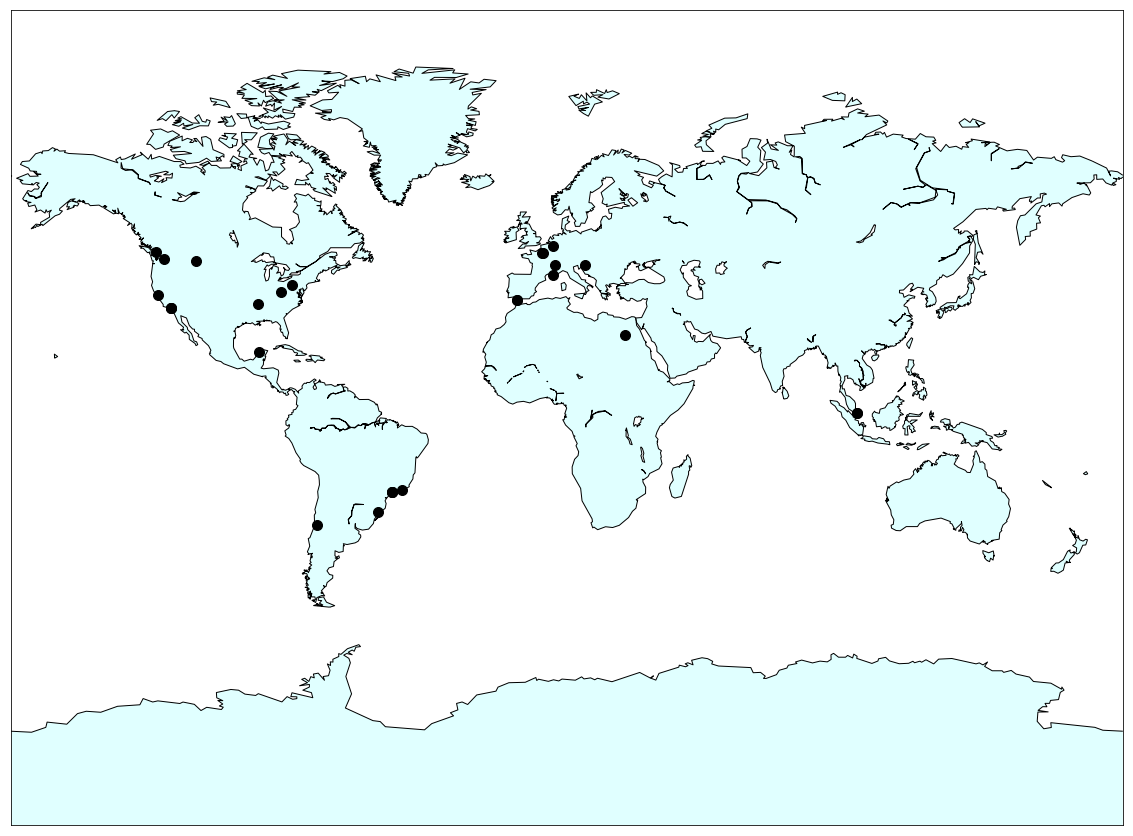

In [4]:
# <summary>
# --- "World of Tweets", v1.0 by bastingup
# World of Tweets basically is a script that collects tweets, and plots them to a basemap
# The installation of basemap can be a little complicated, the easiest way is to use conda in cmd
#
# Last worked on: July 2018.
# Big thanks goes to everybody in Github and StackOverflow. Best communities ever.
# Have fun using this script. Feel free to share, improve and use. No direct credit needed.
# </summar>


# NOTES
#
#
#
#


# <Import libraries>
# Add the syspaths requiered to import Tweepy
import sys
sys.path.append(r"C:\Users\Basti\AppData\Local\Programs\Python\Python36-32\Lib\site-packages")
sys.path.append(r"C:\Users\Basti\AppData\Local\Programs\Python\Python36-32\Lib\site-packages\tweepy")

# Import Tweepy, official Twitter API for Python
import tweepy
from tweepy.streaming import StreamListener as Stream

# Import Basemap and other needed for Basemap
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Import other libraries needed for the project
import pandas
import matplotlib
import time
# </Import libraries>

# <APIs>
# Access details for Twitter API
consumer_key = ""
consumer_secret = ""
access_token = ""
access_token_secret = ""

# Access Twitter with official API for Python
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)
# </APIs>

# <Input>
# Instructions for the user
print("Enter the Twitter Hashtag you wanna search for.")
print("If you would like to search for more than one tweet use the following layout:")
print("hastag1, hastag2, hashtagn...")

# As print() seems to take some time, wait a certain amount of time
time.sleep(0.5)

# Ask for the input
tag = input(r"I wanna search for: ")
# </Input>

# <Map>
# Create the basemap
plt.figure(figsize = (30, 15))
m = Basemap(projection = "mill", resolution = 'c', lon_0 = 10, lat_0 = 50)
m.drawcoastlines()
m.fillcontinents(color = "lightcyan")
# </Map>

# <Tweets>
# Get the tweets you want and plot them to the map.
# You actually have to request a high amount of tweets as only a few people have geo enabled.
df = tweepy.Cursor(api.search, count = 3200, q = tag, tweet_mode ="extended").items(3200)
for tweet in df:
    if tweet.coordinates is not None:
        m.plot(tweet.coordinates["coordinates"][0], tweet.coordinates["coordinates"][1], 'ro', markersize = 10, color = "black", latlon = True)
        #print(tweet.coordinates["coordinates"])
# </Tweets>

# <Draw>
# Actually draw the things you want to plot
plt.show()
# </Draw>